# **Instruções Gerais**

- **Copie** este notebook, junto com as imagens da pasta para o seu Google Drive da UFV
- Resolva o que está sendo pedido no próprio notebook
- Lembre-se de **montar o seu Google Drive** no sistema de arquivos do notebook (ícone da pastinha, na barra de ferramentas à esquerda)
- Entregue, como resposta à atividade no **Moodle**

- **Obs.:**
  - Lembre-se de **salvar** o notebook de tempos em tempos
  - Envie **apenas** o notebook. Não há necessidade de enviar as imagens

# **1. Preâmbulo**

## **1.1. Identifique-se**

Complete o que está sendo pedido na célula a seguir e, em seguida, execute-a

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Informe, dentro das strings, seu nome e número de matrícula
estudante = 'Erick Lima Figueiredo'
matricula = '98898'


## **1.2. Importações de módulos Python**

- As bibliotecas necessárias para a atividade já se encontram importadas na célula a seguir. Mas você pode adicionar novas importações, se achar necessário

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## **1.3. Funções auxiliares já implementadas**

- Para informações mais detalhadas a respeito das funções, consulte o notebook de aula do capítulo "Entropia, Ruídos e Métricas"

### **1.3.1. Função `exibe_mosaico`**

In [4]:
def exibe_mosaico(imagens, legendas, colunas=4, arquivo=None):
  # Largura e altura básicos, de referência, das imagens
  l = 8
  a = 6

  n_imagens = len(imagens)
  if len(imagens) < colunas:
    colunas = len(imagens)
  linhas = n_imagens // colunas + int(n_imagens % colunas > 0)

  fig = plt.figure(figsize=(l*colunas,a*linhas))
  ax = []

  i = j = 0
  for pos, img in enumerate(imagens):
    i = pos // colunas
    j = pos % colunas
    ax.append(fig.add_subplot(linhas, colunas, pos+1))
    ax[-1].axis('off')
    if img.mode == 'L' or img.mode == '1':
      img = img.convert('RGB')
    arr = np.asarray(img)
    ax[-1].imshow(arr)
    ax[-1].set_title(legendas[pos])

  fig.tight_layout()

  if arquivo is not None:
    plt.savefig(arquivo, dpi=300)

  plt.show()

### **1.3.2. Função `gera_imagem`**

In [5]:
def gera_imagem(arr_orig):
  arr = arr_orig.copy()
  arr = np.round(arr).astype(np.uint8)
  arr[arr > 255] = 255
  arr[arr < 0] = 0
  return Image.fromarray(arr)

### **1.3.3. Função `cinza_lum`**

- Produz uma imagem monocromática, em tons de cinza, usando a técnica conhecida como *luminosity*
- Parâmetros:
  - `img`: imagem PIL, em RGB, para a qual se deseja converter para tons de cinza
  - `rgb`: *flag* para indicar se a imagem resultante deverá ser uma monocromática "verdadeira" (matriz bidimensional) ou monocromática RGB, usando 3 canais, porém todos com o mesmo valor (matriz tridimensional). Opcional. Valor *default*: `False`
  - `ret_img`: *flag* para indicar se o retorno deve ser um objeto *PIL Image* (valor verdadeiro) ou *array numpy* (valor falso). Opcional. Valor *default*: `False`
- Retorno:
  - Objeto *PIL Image* ou *array numpy*, de acordo com a especificação dos parâmetros

In [6]:
def cinza_lum(img, rgb=False, ret_img=False):
  arr = np.asarray(img).astype(float)

  T = [0.299, 0.587, 0.114]

  T = np.array(T).T

  arrC = np.dot(arr, T)

  if rgb:
    arrC = np.dstack((arrC, arrC, arrC))

  if ret_img:
    return gera_imagem(arrC)
  else:
    return arrC

## **1.4. Inicialização de *path***

- Lembre-se de alterar o valor da string de path para a pasta do seu Drive onde você salvou o notebook e as imagens.
- O caminho da string deve terminar com um caractere de barra (`/`), para que o restante do código funcione sem alterações.

In [7]:
path = '/content/drive/MyDrive/Praticas PDI/'

# **2. Exercícios**

## **2.1. Conversão RGB -> HSV e HSV -> RGB**

Como primeiro exercício, e do qual precisaremos da solução para resolver o próximo, vamos implementar duas funções que fazem a conversão do espaço de cores RGB para o espaço HSV e vice-versa.

O algoritmo encontra-se nos slides 71 a 73 do material de aula e uma implementação que você pode utilizar para se basear está nas conversões RGB para HSL e vice-versa, no notebook de aula correspondente.

No entanto, só recomendo basear na implementação pronta se você estiver confortável com a manipulação de arrays via numpy que é feita lá. Caso contrário, sugiro que você faça sua própria implementação com *for* e *if* diretamente baseada no algoritmo dos slides.

#### **Preparando os testes**

Execute a célula abaixo para visualizar a imagem original.


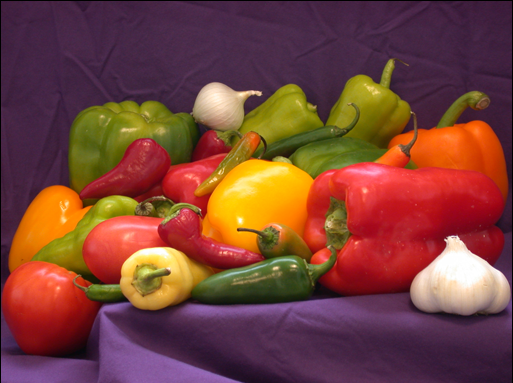

In [8]:
img = Image.open(path + 'pimentas.png').convert('RGB')
display(img)

#### **Exercício:**

Implemente os corpos das funções `rgb2hsv` e `hsv2rgb` abaixo, conforme especificado. Ambas trabalharão somente no nível de *arrays numpy*. Isto é, recebem como entradas matrizes $(n \times m \times 3)$ e retornam matrizes deste mesmo formato.

In [9]:
def rgb2hsv(arr):
  arr_c = arr/255

  h,w,_ = arr_c.shape

  arr_max = np.zeros((h,w))
  arr_min = np.zeros((h,w))

  for i in range(h):
    for j in range(w):
      arr_max[i,j] = np.max(arr_c[i,j])
      arr_min[i,j] = np.min(arr_c[i,j])

  delta = arr_max - arr_min

  H = np.zeros((h,w))
  S = np.zeros((h,w))

  for i in range(h):
    for j in range(w):
      if not delta[i,j]:
        S[i,j] = 0
        H[i,j] = 0
      elif arr_max[i,j] == arr_c[i,j][0]:
        H[i,j] = 60 * (((arr_c[i,j][1]-arr_c[i,j,2]) / delta[i,j]) % 6)
      elif arr_max[i,j] == arr_c[i,j][1]:
        H[i,j] = 60 * (((arr_c[i,j][2]-arr_c[i,j,0]) / delta[i,j]) + 2)
      else:
        H[i,j] = 60 * (((arr_c[i,j][0]-arr_c[i,j,1]) / delta[i,j]) + 4)

      if delta[i,j]:
        S[i,j] = delta[i,j]/arr_max[i,j]


  return np.dstack((H,S,arr_max))


In [10]:
def hsv2rgb(arr):
  h,w,_ = arr.shape

  c = arr[:,:,1] * arr[:,:,2]
  x = c * (1 - abs((arr[:,:,0]/60)%2-1))
  m = arr[:,:,2] - c

  arr_rgb = np.zeros((h, w, 3))

  for i in range(h):
    for j in range(w):
      if arr[i,j,0] >= 0 and arr[i,j,0] < 60:
        arr_rgb[i,j] = (c[i,j], x[i,j], 0)
      elif arr[i,j,0] >= 60 and arr[i,j,0] < 120:
        arr_rgb[i,j] = (x[i,j], c[i,j], 0)
      elif arr[i,j,0] >= 120 and arr[i,j,0] < 180:
        arr_rgb[i,j] = (0, c[i,j], x[i,j])
      elif arr[i,j,0] >= 180 and arr[i,j,0] < 240:
        arr_rgb[i,j] = (0, x[i,j], c[i,j])
      elif arr[i,j,0] >= 240 and arr[i,j,0] < 300:
        arr_rgb[i,j] = (x[i,j], 0, c[i,j])
      else:
        arr_rgb[i,j] = (c[i,j], 0, x[i,j])

  arr_rgb[:,:,0] = np.around((arr_rgb[:,:,0] + m) * 255)
  arr_rgb[:,:,1] = np.around((arr_rgb[:,:,1] + m) * 255)
  arr_rgb[:,:,2] = np.around((arr_rgb[:,:,2] + m) * 255)

  return arr_rgb



#### **Testando sua solução**

Faremos o teste, conforme feito em sala. Ou seja, convertemos uma imagem para HSV usando a nossa função e depois convertemos de volta para RGB, também usando nossa função. Se a diferença entre elas for zero, as implementações estão corretas.

Computaremos a diferença usando a métrica RMSE.

In [11]:
def rmse(arr1, arr2):
  return np.sqrt(np.sum((arr1 - arr2)**2))

In [12]:
arrOrig = np.asarray(img).astype(float)
arrHSV = rgb2hsv(arrOrig)
arrReconstr = hsv2rgb(arrHSV)

print('RMSE = %.5f' % rmse(arrOrig, arrReconstr))

RMSE = 0.00000


- Se o valor de RMSE exibido acima foi zero, a implementação está correta e você pode avançar para o próximo exercício

## **2.2. Filtros "destaque de cor" e "destaque de cor modificado"**

Em sala, foi mostrado um filtro que chamamos de "destaque de cor" (slide 22 do material). Também, em sala, vimos uma possível implementação para o mesmo (notebook "Parte 02", dos notebooks de aula).

Porém, discutimos que havia um problema com a implementação apresentada lá. O uso de RGB poderia trazer alguns "artefatos" de cor que não estavam tão próximos das cores desejadas.

Uma maneira de se solucionar o problema é utilizar um espaço de cor mais adequado para ordenar cores. A melhor maneira seria utilizar o espaço CIELab, mas como não discutimos sua implementação, vamos testar outra abordagem... Vamos usar, como base para a medida de distância de cores, o canal H, do espaço HSV.

Implemente, na célula abaixo, o código do filtro usando RGB (baseie-se no que foi dado em sala de aula).

***Obs.:** a função deve retornar uma **imagem**.

In [13]:
def dist(p_a, p_b):
  return ((p_a[0] - p_b[0])**2+(p_a[1] - p_b[1])**2+(p_a[2] - p_b[2])**2)**(1/2)

In [14]:
def destaque_corRGB(arr, ref, delta):
  ################# COMPLETE COM SEU CÓDIGO #####################
  arr_c = arr.copy()
  arr_c[:,:,0]*=.299
  arr_c[:,:,1]*=.587
  arr_c[:,:,2]*=.114

  h,w,_ = arr.shape

  for i in range(h):
    for j in range(w):
      arr_c[i,j] = arr[i,j] if dist(arr[i,j], ref) < delta else arr_c[i,j]

  return gera_imagem(arr_c)

#### Implemente, agora, o corpo da função a seguir:

***Obs.:** a função deve retornar uma **imagem**.

In [15]:
def destaque_corHSV(arr, ref, delta):
  ################# COMPLETE COM SEU CÓDIGO #####################
  arr_hsv = rgb2hsv(arr)

  arr_c = arr.copy()
  arr_c[:,:,0]*=.299
  arr_c[:,:,1]*=.587
  arr_c[:,:,2]*=.114

  h,w,_ = arr.shape

  for i in range(h):
    for j in range(w):
      arr_c[i,j] = arr[i,j] if dist(arr_hsv[i,j], ref) < delta else arr_c[i,j]

  return gera_imagem(arr_c)


#### **Testando seu código**

In [ ]:
arr = np.asarray(img).astype(float)

refs = np.array([
    [106, 118, 37],
    [190, 30, 37],
    [255, 195, 15],
    [66, 36, 66]
])
deltas = np.linspace(0.1, 0.4, 3, endpoint=True)

imagens = []
legendas = []

for ref in refs:
  for delta in deltas:
    imagens.append(img)
    legendas.append('Original')

    imgRef = gera_imagem(np.zeros(arr.shape) + ref)
    imagens.append(imgRef)
    legendas.append('Cor de referência')

    imgEf = destaque_corRGB(arr, ref, delta)
    imagens.append(imgEf)
    legendas.append('RGB: Cor ref. = [%d, %d, %d], delta = %.2f' % (ref[0], ref[1], ref[2], delta))

    imgEf = destaque_corHSV(arr, ref, delta)
    imagens.append(imgEf)
    legendas.append('HSV: Cor ref. = [%d, %d, %d], delta = %.2f' % (ref[0], ref[1], ref[2], delta))

exibe_mosaico(imagens, legendas, colunas=4)

## **2.3. *Alpha Blending***

É a combinação de duas imagens, $A$ e $B$, em uma terceira, $C$, usando a seguinte regra: $C = A + (B - A) \cdot \alpha$

Onde $\alpha$ é um parâmetro definido pelo usuário.

Na próxima célula, são carregadas as imagens usadas no exercício.

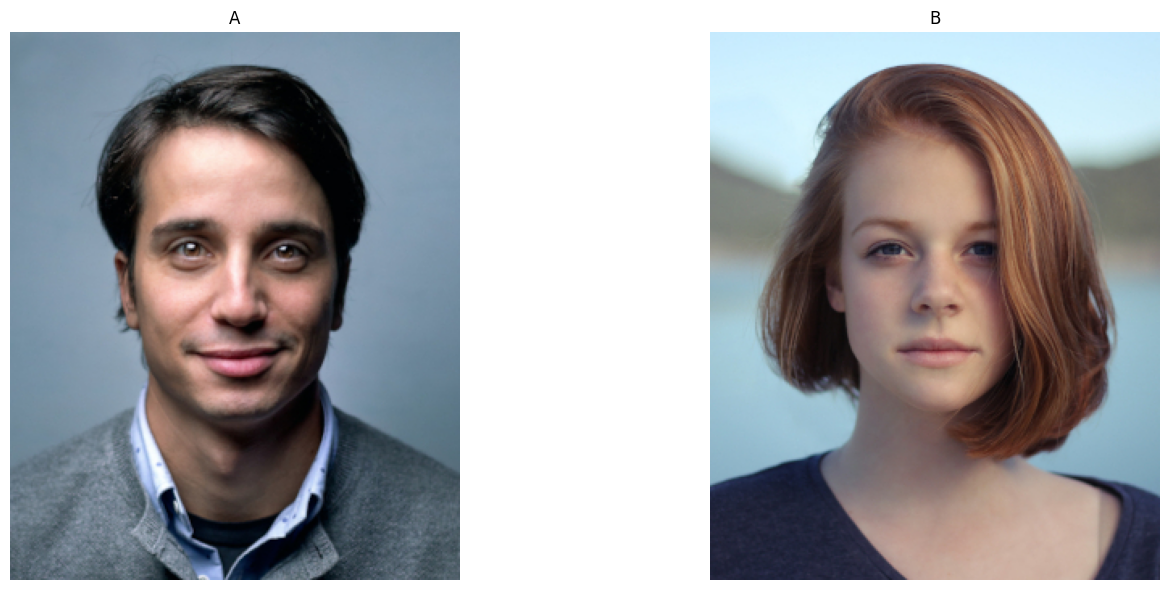

In [ ]:
img1 = Image.open(path + 'rapaz.jpg')
img2 = Image.open(path + 'moca.jpg')

arr1 = np.asarray(img1).astype(float)
arr2 = np.asarray(img2).astype(float)

imagens = [img1,img2]
legendas = ['A', 'B']
exibe_mosaico(imagens, legendas, colunas=3)

## **2.3.1. Implementação do *alpha blending***

Complete o código a seguir, onde está pedido, para implementar uma solução de *alpha blending*, como definido acima. A própria célula já testa a implementação

In [ ]:
imagens = []
legendas = []

for alpha in np.linspace(0, 1, 9, endpoint=True):

  ############# INÍCIO DO TRECHO EDITÁVEL #############

  arr3 = arr1 + (arr2 - arr1)*alpha

  #############  FIM DO TRECHO EDITÁVEL   #############

  img3 = gera_imagem(arr3)

  imagens.append(img3)
  legendas.append(R'$C = A + (B-A)\cdot \alpha$, com $\alpha =$ %.2f' % alpha)

exibe_mosaico(imagens, legendas, colunas=3)

## **2.3.2. Aplicação do *alpha blending***

Implemente, na célula a seguir, o uso de *alpha blending* para escurecer uma imagem. A lógica é a seguinte:

1. Considere $A$, como sendo a imagem de entrada

2. Considere $P$, como sendo uma imagem de mesmo formato de $A$, porém composta integralmente pela cor preta

3. Para valores de $\alpha$ variando de $0.1$ a $1.0$, com passo de $0.2$ (cinco valores, portanto), faça:

  a. Faça o *alpha blending* de $A$ com $P$

  b. Salve o resultado em uma lista

4. Exiba em tela os resultados de cada passo

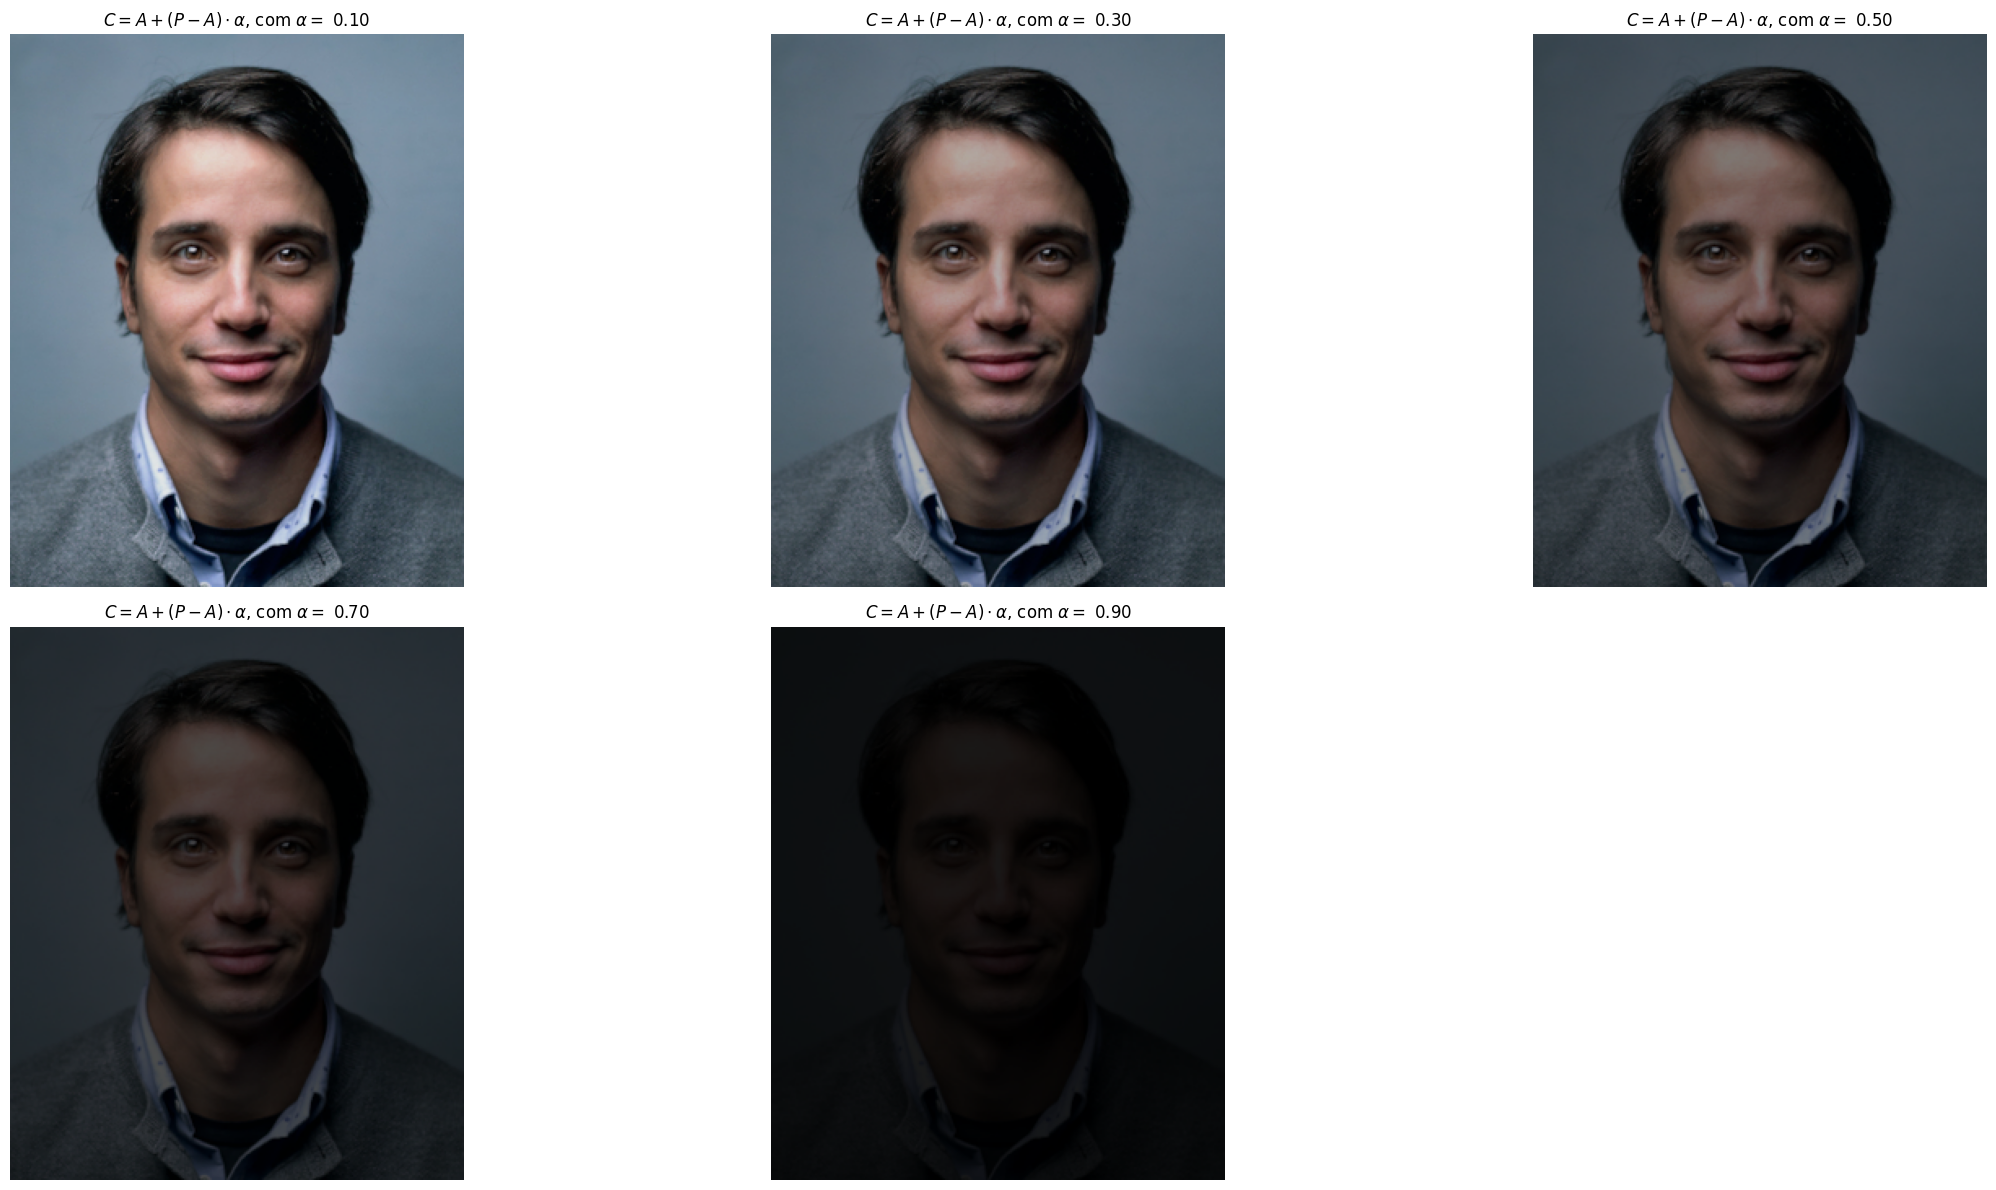

In [ ]:
################# COMPLETE COM SEU CÓDIGO #####################

imagens = []
legendas = []

p = np.zeros((arr1.shape))

for alpha in np.arange(.1, 1, .2):

  ############# INÍCIO DO TRECHO EDITÁVEL #############

  arr3 = arr1 + (p - arr1)*alpha

  #############  FIM DO TRECHO EDITÁVEL   #############

  img3 = gera_imagem(arr3)

  imagens.append(img3)
  legendas.append(R'$C = A + (P-A)\cdot \alpha$, com $\alpha =$ %.2f' % alpha)

exibe_mosaico(imagens, legendas, colunas=3)


## **2.3.3. Generalização do exercício anterior**

1. Generalize sua implementação do exercício anterior para que:

  - Ao invés de realizar o *blending* apenas com uma imagem preta, possa realizar a mesma operação com um tom de cor RGB qualquer (chamaremos de $C$ esta cor)

  - Você possa escolher se fará o blending de $A$ com $C$ ou de $C$ com $A$.

  ***Obs.:** Note que $A + \alpha \cdot (C - A) \neq C + \alpha \cdot (A - C)$

2. Teste com cores de referências quaisquer

3. Exiba os resultados em tela, como no exercício **2.3.2.** (faça a exibição de cada passo dentro da própria função)

In [ ]:
# Parâmetros:
#  arr: array de dados de entrada
#  cor: lista contendo 3 inteiros representando os canais RGB (converta para array dentro da função)
#  aplicarEmArr: booleano indicando se fará aplicando em A (True) ou cor (False)
#  npassos: quantos passos serão gerados para alfa em [0,1]
# Retorno:
#   não há. A função gera as imagens e exibe em tela, evocando exibe_mosaico
def blending(arr, cor, aplicarEmArr, npassos=5):
  ################# COMPLETE COM SEU CÓDIGO #####################
  imagens = []
  legendas = []

  c = np.ones(arr.shape) * cor

  for alpha in np.arange(.1, 1, 1/npassos):

    if aplicarEmArr:
      arr1 = arr + (c - arr)*alpha
    else:
      arr1 = c + (arr - c)*alpha


    img = gera_imagem(arr1)

    imagens.append(img)

    legendas.append(R'$I = A + (C-A)\cdot \alpha$, com $\alpha =$ %.2f' % alpha)

  exibe_mosaico(imagens, legendas, colunas=3)


#### **Teste seus resultados:**

Implemente 4 testes: nos dois primeiros, escolha uma cor RGB qualquer e exiba o resultado de cada possibilidade de *blending* $A$ com $C$ ou $C$ com $A$. Nos dois seguintes, repita o processo, mas para um tom de cinza.

In [ ]:
cor = [205, 34, 10]
cinza = [128, 128, 128]

blending(arr1, cor, aplicarEmArr=True)
blending(arr1, cor, aplicarEmArr=False)
blending(arr1, cinza, aplicarEmArr=True)
blending(arr1, cinza, aplicarEmArr=False)

blending(arr1, (0, 255, 255), aplicarEmArr=True)
blending(arr1, (0, 255, 255), aplicarEmArr=False)
blending(arr1, (80, 80, 80), aplicarEmArr=True)
blending(arr1, (80, 80, 80), aplicarEmArr=False)

#### **Bons estudos!**

- Lembre-se de enviar **apenas** o notebook
- **Limpe as saídas em tela** antes de enviar. Isso diminui significativamente o tamanho do arquivo a ser enviado e não gera problemas de recusa de envio no Moodle. Para isso:
  - Vá no menu *Editar*
  - Escolha a opção *Limpar todas as saídas*
  - Salve o notebook